<a href="https://colab.research.google.com/github/JustineCole/PerformanceSpecs/blob/main/O_SummaryBoxWhisk_%26_t_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

OS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/LipidPerf/from_Pandas")

Mounted at /content/drive/


Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

## Data

In [ ]:
errorcL1 = pd.read_csv("Old_Criteria/Error/errorcL.csv")
errorcL2 = pd.read_csv("New_Criteria/Error/errorL.csv")
errorN1 = pd.read_csv("Old_Criteria/Error/errorN.csv")
errorN2 = pd.read_csv("New_Criteria/Error/errorN.csv")
errordL = pd.read_csv("Old_Criteria/Error/errordL.csv")

In [ ]:
errorcL1

,Step,Criteria,Scenario,Error Added,ReClassd_1,ReClassd_2,ReClassd_3,ReClassd_4,ReClassd_5,ReClassd_6,...,ReClassd_44,ReClassd_45,ReClassd_46,ReClassd_47,ReClassd_48,ReClassd_49,ReClassd_50,max,min,mean
0,1,old,0.0,BV,6.3,6.6,6.3,6.3,6.4,5.3,...,6.2,6.1,6.2,6.2,6.1,6.3,5.9,6.7,5.3,6.302
1,2,old,0.1,CV,3.7,3.4,3.4,3.4,3.6,3.4,...,3.5,3.5,3.3,3.4,3.6,3.4,3.3,3.8,2.9,3.414
2,3,old,0.2,BV + CV,7.0,7.2,7.2,7.3,7.2,6.0,...,6.9,6.6,7.0,6.7,7.3,7.2,6.9,7.7,6.0,7.098
3,4,old,1.1,PB1 + CV,7.0,7.0,7.2,6.9,7.1,6.9,...,7.1,6.9,7.2,7.2,7.2,6.9,7.0,7.3,6.7,7.054
4,5,old,1.2,PB1 + BV + CV,9.3,9.9,9.6,9.1,9.6,8.8,...,9.5,9.4,9.1,9.4,9.7,9.6,9.3,10.1,8.8,9.514
5,6,old,2.1,PB2 + CV,5.4,5.1,5.2,5.1,5.2,5.3,...,5.4,5.3,5.3,4.9,5.3,5.3,5.1,5.6,4.9,5.228
6,7,old,2.2,PB2 + BV + CV,7.5,7.9,7.7,7.5,7.6,7.2,...,8.0,7.5,7.5,7.4,7.6,7.8,7.6,8.1,7.1,7.630


In [ ]:
errorN1

,Step,Criteria,Scenario,Error Added,ReClassd_1,ReClassd_2,ReClassd_3,ReClassd_4,ReClassd_5,ReClassd_6,...,ReClassd_44,ReClassd_45,ReClassd_46,ReClassd_47,ReClassd_48,ReClassd_49,ReClassd_50,max,min,mean
0,1,old,0.0,BV,5.4,5.9,5.6,5.7,5.8,5.7,...,5.8,5.6,5.3,5.7,5.7,5.7,5.6,6.2,5.2,5.676
1,2,old,0.1,CV,3.3,2.7,2.9,3.2,3.1,3.0,...,3.1,3.2,3.0,2.9,3.1,3.0,2.9,3.3,2.7,3.046
2,3,old,0.2,BV + CV,6.3,6.4,6.2,6.5,6.6,6.4,...,6.6,6.3,6.3,6.3,6.5,6.4,6.4,7.0,5.9,6.452
3,4,old,1.1,PB1 + CV,6.4,5.9,6.2,6.1,6.3,6.2,...,6.3,6.3,6.4,6.4,6.5,6.0,6.0,6.6,5.9,6.246
4,5,old,1.2,PB1 + BV + CV,8.2,8.6,8.5,8.4,8.7,8.4,...,8.6,8.2,8.4,8.3,8.6,8.5,8.3,9.2,8.2,8.590
5,6,old,2.1,PB2 + CV,4.8,4.6,4.7,4.3,4.6,4.6,...,4.6,4.5,4.5,4.2,4.8,4.5,4.7,4.9,4.2,4.610
6,7,old,2.2,PB2 + BV + CV,6.8,7.3,6.9,6.8,7.0,6.9,...,7.5,7.1,6.9,6.5,7.1,7.2,6.9,7.5,6.5,6.954


In [ ]:
#reorder the steps: 2,4,6,3,5,7
errorcL1 = errorcL1.iloc[[1,3,5,0,2,4,6],:]
errorcL2 = errorcL2.iloc[[1,3,5,2,4,6],:]
errorN1 = errorN1.iloc[[1,3,5,0,2,4,6],:]
errorN2 = errorN2.iloc[[1,3,5,2,4,6],:]
errordL = errordL.iloc[[1,3,5,0,2,4,6],:]

In [ ]:
errordL

,Step,Criteria,Scenario,Error Added,ReClassd_1,ReClassd_2,ReClassd_3,ReClassd_4,ReClassd_5,ReClassd_6,...,ReClassd_44,ReClassd_45,ReClassd_46,ReClassd_47,ReClassd_48,ReClassd_49,ReClassd_50,max,min,mean
1,2,old,0.1,CV,3.2,3.0,3.0,3.1,2.9,3.0,...,3.0,3.2,3.1,2.8,3.0,3.0,2.9,3.5,2.7,3.016
3,4,old,1.1,PB1 + CV,5.6,5.5,5.6,5.5,5.2,5.6,...,5.4,5.4,5.8,5.5,5.6,5.3,5.4,6.0,5.2,5.526
5,6,old,2.1,PB2 + CV,4.3,4.2,4.4,4.1,4.2,4.1,...,4.3,4.3,4.2,3.8,4.0,4.4,4.3,4.5,3.8,4.244
0,1,old,0.0,BV,5.8,6.0,5.5,5.9,5.9,5.5,...,6.1,5.7,5.8,5.9,5.6,5.7,6.0,6.6,5.5,5.914
2,3,old,0.2,BV + CV,6.7,6.5,6.3,6.9,6.7,6.1,...,6.8,6.2,6.5,6.6,6.4,6.5,6.9,7.4,6.1,6.590
4,5,old,1.2,PB1 + BV + CV,7.9,8.3,8.0,8.4,8.4,8.1,...,8.6,7.7,8.2,8.2,8.2,8.1,8.6,9.0,7.7,8.314
6,7,old,2.2,PB2 + BV + CV,6.8,6.9,6.7,6.7,6.8,6.5,...,7.2,6.8,6.8,6.6,6.6,6.8,6.9,7.2,6.4,6.816


In [ ]:
reclass = list(errorcL1.columns)
del reclass[0:3]
del reclass[-1]
del reclass[-1]
del reclass[-1]
df1_long = pd.melt(errorcL1, id_vars=['Step','Criteria','Error Added'], value_vars= reclass, value_name= 'Reclassified (%)', ignore_index = True)
df2_long = pd.melt(errorcL2, id_vars=['Step','Criteria','Error Added'], value_vars= reclass, value_name= 'Reclassified (%)', ignore_index = True)
df3_long = pd.melt(errorN1, id_vars=['Step','Criteria','Error Added'], value_vars= reclass, value_name= 'Reclassified (%)', ignore_index = True)
df4_long = pd.melt(errorN2, id_vars=['Step','Criteria','Error Added'], value_vars= reclass, value_name= 'Reclassified (%)', ignore_index = True)
df5_long = pd.melt(errordL, id_vars=['Step','Criteria','Error Added'], value_vars= reclass, value_name= 'Reclassified (%)', ignore_index = True)

In [ ]:
df1_long['LipoType'] = 'cLDL'
df2_long['LipoType'] = 'cLDL'
df3_long['LipoType'] = 'NHDL'
df4_long['LipoType'] = 'NHDL'
df5_long['LipoType'] = 'dLDL'
df_long = pd.concat([df1_long, df2_long, df3_long, df4_long], join = "outer", ignore_index=True)
df_long['Type'] = df_long['LipoType']+'_'+df_long['Criteria']
df5_long['Type'] = 'dLDL'
all_err = pd.concat([df_long, df5_long])

#Functions

###Create box and whisker chart

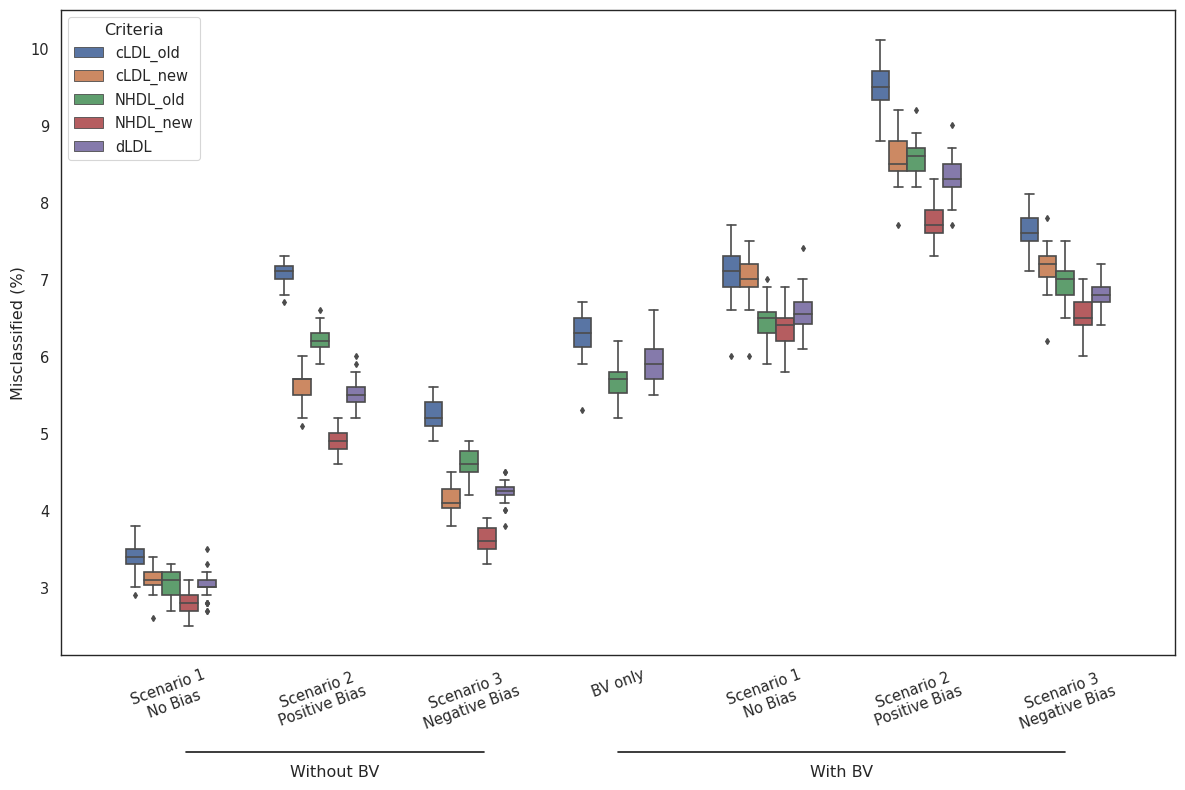

In [ ]:
sns.set_theme(context = 'paper', style="white", font_scale = 1.2)
fig, ax = plt.subplots(figsize = (12,8), tight_layout=True)
sns.diverging_palette(220, 20, as_cmap = True)

sns.boxplot(data=all_err, x="Error Added",order = ['CV', 'PB1 + CV','PB2 + CV', 'BV', 'BV + CV','PB1 + BV + CV','PB2 + BV + CV'], width = 0.6, y="Reclassified (%)",  hue="Type", ax=ax, fliersize = 3)
#plt.title('Total Reclassifications Given Old vs New Criteria: '+param, fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)


labels = ['BV only','Scenario 1 No Bias', 'Scenario 2 Positive Bias', 'Scenario 3 Negative Bias', 'Scenario 1 No Bias', 'Scenario 2 Positive Bias', 'Scenario 3 Negative Bias']
labels1 = ['\n'.join(wrap(l, 11)) for l in [labels[1],labels[4]]]
labels2 = ['\n'.join(wrap(l, 15)) for l in [labels[2],labels[3],labels[5],labels[6]]]
labels = [labels1[0], labels2[0], labels2[1], labels[0], labels1[1], labels2[2], labels2[3]]
ax.set_xticklabels(labels)

#ax.set_xlabel('Error Added',labelpad = 40)
ax.set_xlabel('')
ax.set_ylabel('Misclassified (%)')
ax.set_yticks([3,4,5,6,7,8,9,10])
ax.set_ylim(ymax=10.5, auto = False)

trans = ax.get_xaxis_transform()
ax.annotate("Without BV", xy=(1.1, -.17), xycoords=trans, ha="center", va="top")
ax.plot([0.1,2.1],[-.15,-.15], color="k", transform=trans, clip_on=False)
ax.annotate("With BV", xy=(4.5, -.17), xycoords=trans, ha="center", va="top")
ax.plot([3,6],[-.15,-.15], color="k", transform=trans, clip_on=False)

ax.legend(title = 'Criteria', loc = 'upper left')

fig = plt.gcf()
plt.tight_layout()
fig.savefig('Figures/BoxWhisk2.tiff', dpi = 600, format="tiff", pil_kwargs={"compression": "tiff_lzw"})

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
all_err

,Step,Criteria,Error Added,variable,Reclassified (%),LipoType,Type
0,2,old,CV,ReClassd_1,3.7,cLDL,cLDL_old
1,4,old,PB1 + CV,ReClassd_1,7.0,cLDL,cLDL_old
2,6,old,PB2 + CV,ReClassd_1,5.4,cLDL,cLDL_old
3,1,old,BV,ReClassd_1,6.3,cLDL,cLDL_old
4,3,old,BV + CV,ReClassd_1,7.0,cLDL,cLDL_old
...,...,...,...,...,...,...,...
345,6,old,PB2 + CV,ReClassd_50,4.3,dLDL,dLDL
346,1,old,BV,ReClassd_50,6.0,dLDL,dLDL
347,3,old,BV + CV,ReClassd_50,6.9,dLDL,dLDL
348,5,old,PB1 + BV + CV,ReClassd_50,8.6,dLDL,dLDL


In [ ]:
stats_df = all_err[(all_err['LipoType'] != 'dLDL') & (all_err['Error Added'] != 'BV') & (all_err['Step'] != 1)]

In [ ]:
samplenames  = []
for b in ('_noBV','_BV'):
  for scenario in ('1','2','3'):
    for lipid in stats_df['Type'].unique():
      samplenames.append(lipid + scenario + b)

In [ ]:
samplenames  = []
for b in ('_noBV','_BV'):
  for scenario in ('1','2','3'):
    scenlist = []
    for lipid in stats_df['Type'].unique():
      scenlist.append(lipid + scenario + b)
    samplenames.append(scenlist)
samplenames

[['cLDL_old1_noBV', 'cLDL_new1_noBV', 'NHDL_old1_noBV', 'NHDL_new1_noBV'],
 ['cLDL_old2_noBV', 'cLDL_new2_noBV', 'NHDL_old2_noBV', 'NHDL_new2_noBV'],
 ['cLDL_old3_noBV', 'cLDL_new3_noBV', 'NHDL_old3_noBV', 'NHDL_new3_noBV'],
 ['cLDL_old1_BV', 'cLDL_new1_BV', 'NHDL_old1_BV', 'NHDL_new1_BV'],
 ['cLDL_old2_BV', 'cLDL_new2_BV', 'NHDL_old2_BV', 'NHDL_new2_BV'],
 ['cLDL_old3_BV', 'cLDL_new3_BV', 'NHDL_old3_BV', 'NHDL_new3_BV']]

In [ ]:
steps = stats_df['Step'].unique()
steps

array([2, 4, 6, 3, 5, 7])

In [ ]:
lipids = stats_df['Type'].unique()
lipids

array(['cLDL_old', 'cLDL_new', 'NHDL_old', 'NHDL_new'], dtype=object)

In [ ]:
for scenario,step in zip(samplenames,steps):
  for sample, lipid in zip(scenario,lipids):
    sample = stats_df[(stats_df['Step']==step) & (stats_df['Type']==lipid)]

In [ ]:
cLDL_old1 = all_err[(all_err['Step'] ==2) & (all_err['Type'] =='cLDL_old') & (all_err['Error Added'] !='BV')].reset_index()
cLDL_new1 = all_err[(all_err['Step'] ==2) & (all_err['Type'] =='cLDL_new')].reset_index()
NHDL_old1 = all_err[(all_err['Step'] ==2) & (all_err['Type'] =='NHDL_old') & (all_err['Error Added'] !='BV')].reset_index()
NHDL_new1 = all_err[(all_err['Step'] ==2) & (all_err['Type'] =='NHDL_new')].reset_index()

cLDL_old2 = all_err[(all_err['Step'] ==4) & (all_err['Type'] =='cLDL_old') & (all_err['Error Added'] !='BV')].reset_index()
cLDL_new2 = all_err[(all_err['Step'] ==4) & (all_err['Type'] =='cLDL_new')].reset_index()
NHDL_old2 = all_err[(all_err['Step'] ==4) & (all_err['Type'] =='NHDL_old') & (all_err['Error Added'] !='BV')].reset_index()
NHDL_new2 = all_err[(all_err['Step'] ==4) & (all_err['Type'] =='NHDL_new')].reset_index()

cLDL_old3 = all_err[(all_err['Step'] ==6) & (all_err['Type'] =='cLDL_old') & (all_err['Error Added'] !='BV')].reset_index()
cLDL_new3 = all_err[(all_err['Step'] ==6) & (all_err['Type'] =='cLDL_new')].reset_index()
NHDL_old3 = all_err[(all_err['Step'] ==6) & (all_err['Type'] =='NHDL_old') & (all_err['Error Added'] !='BV')].reset_index()
NHDL_new3 = all_err[(all_err['Step'] ==6) & (all_err['Type'] =='NHDL_new')].reset_index()

cLDL_old1B = all_err[(all_err['Step'] ==3) & (all_err['Type'] =='cLDL_old') & (all_err['Error Added'] !='BV')].reset_index()
cLDL_new1B = all_err[(all_err['Step'] ==3) & (all_err['Type'] =='cLDL_new')].reset_index()
NHDL_old1B = all_err[(all_err['Step'] ==3) & (all_err['Type'] =='NHDL_old') & (all_err['Error Added'] !='BV')].reset_index()
NHDL_new1B = all_err[(all_err['Step'] ==3) & (all_err['Type'] =='NHDL_new')].reset_index()

cLDL_old2B = all_err[(all_err['Step'] ==5) & (all_err['Type'] =='cLDL_old') & (all_err['Error Added'] !='BV')].reset_index()
cLDL_new2B = all_err[(all_err['Step'] ==5) & (all_err['Type'] =='cLDL_new')].reset_index()
NHDL_old2B = all_err[(all_err['Step'] ==5) & (all_err['Type'] =='NHDL_old') & (all_err['Error Added'] !='BV')].reset_index()
NHDL_new2B = all_err[(all_err['Step'] ==5) & (all_err['Type'] =='NHDL_new')].reset_index()

cLDL_old3B = all_err[(all_err['Step'] ==7) & (all_err['Type'] =='cLDL_old') & (all_err['Error Added'] !='BV')].reset_index()
cLDL_new3B = all_err[(all_err['Step'] ==7) & (all_err['Type'] =='cLDL_new')].reset_index()
NHDL_old3B = all_err[(all_err['Step'] ==7) & (all_err['Type'] =='NHDL_old') & (all_err['Error Added'] !='BV')].reset_index()
NHDL_new3B = all_err[(all_err['Step'] ==7) & (all_err['Type'] =='NHDL_new')].reset_index()

In [ ]:
LDL_S1 = ttest_rel(cLDL_old1['Reclassified (%)'],cLDL_new1['Reclassified (%)'])
NHDL_S1 = ttest_rel(NHDL_old1['Reclassified (%)'],NHDL_new1['Reclassified (%)'])
LvNold_S1 = ttest_rel(cLDL_old1['Reclassified (%)'],NHDL_old1['Reclassified (%)'])
LvNnew_S1 = ttest_rel(cLDL_new1['Reclassified (%)'],NHDL_new1['Reclassified (%)'])

LDL_S2 = ttest_rel(cLDL_old2['Reclassified (%)'],cLDL_new2['Reclassified (%)'])
NHDL_S2 = ttest_rel(NHDL_old2['Reclassified (%)'],NHDL_new2['Reclassified (%)'])
LvNold_S2 = ttest_rel(cLDL_old2['Reclassified (%)'],NHDL_old2['Reclassified (%)'])
LvNnew_S2 = ttest_rel(cLDL_new2['Reclassified (%)'],NHDL_new2['Reclassified (%)'])

LDL_S3 = ttest_rel(cLDL_old3['Reclassified (%)'],cLDL_new3['Reclassified (%)'])
NHDL_S3 = ttest_rel(NHDL_old3['Reclassified (%)'],NHDL_new3['Reclassified (%)'])
LvNold_S3 = ttest_rel(cLDL_old3['Reclassified (%)'],NHDL_old3['Reclassified (%)'])
LvNnew_S3 = ttest_rel(cLDL_new3['Reclassified (%)'],NHDL_new3['Reclassified (%)'])

In [ ]:
LDL_S1B = ttest_rel(cLDL_old1B['Reclassified (%)'],cLDL_new1B['Reclassified (%)'])
NHDL_S1B = ttest_rel(NHDL_old1B['Reclassified (%)'],NHDL_new1B['Reclassified (%)'])
LvNold_S1B = ttest_rel(cLDL_old1B['Reclassified (%)'],NHDL_old1B['Reclassified (%)'])
LvNnew_S1B = ttest_rel(cLDL_new1B['Reclassified (%)'],NHDL_new1B['Reclassified (%)'])

LDL_S2B = ttest_rel(cLDL_old2B['Reclassified (%)'],cLDL_new2B['Reclassified (%)'])
NHDL_S2B = ttest_rel(NHDL_old2B['Reclassified (%)'],NHDL_new2B['Reclassified (%)'])
LvNold_S2B = ttest_rel(cLDL_old2B['Reclassified (%)'],NHDL_old2B['Reclassified (%)'])
LvNnew_S2B = ttest_rel(cLDL_new2B['Reclassified (%)'],NHDL_new2B['Reclassified (%)'])

LDL_S3B = ttest_rel(cLDL_old3B['Reclassified (%)'],cLDL_new3B['Reclassified (%)'])
NHDL_S3B = ttest_rel(NHDL_old3B['Reclassified (%)'],NHDL_new3B['Reclassified (%)'])
LvNold_S3B = ttest_rel(cLDL_old3B['Reclassified (%)'],NHDL_old3B['Reclassified (%)'])
LvNnew_S3B = ttest_rel(cLDL_new3B['Reclassified (%)'],NHDL_new3B['Reclassified (%)'])

In [ ]:
my_dict = {'LDL_S1' : ttest_rel(cLDL_old1['Reclassified (%)'],cLDL_new1['Reclassified (%)']),
'NHDL_S1' : ttest_rel(NHDL_old1['Reclassified (%)'],NHDL_new1['Reclassified (%)']),
'LvNold_S1' : ttest_rel(cLDL_old1['Reclassified (%)'],NHDL_old1['Reclassified (%)']),
'LvNnew_S1' : ttest_rel(cLDL_new1['Reclassified (%)'],NHDL_new1['Reclassified (%)']),

'LDL_S2' : ttest_rel(cLDL_old2['Reclassified (%)'],cLDL_new2['Reclassified (%)']),
'NHDL_S2' : ttest_rel(NHDL_old2['Reclassified (%)'],NHDL_new2['Reclassified (%)']),
'LvNold_S2' : ttest_rel(cLDL_old2['Reclassified (%)'],NHDL_old2['Reclassified (%)']),
'LvNnew_S2' : ttest_rel(cLDL_new2['Reclassified (%)'],NHDL_new2['Reclassified (%)']),

'LDL_S3' : ttest_rel(cLDL_old3['Reclassified (%)'],cLDL_new3['Reclassified (%)']),
'NHDL_S3' : ttest_rel(NHDL_old3['Reclassified (%)'],NHDL_new3['Reclassified (%)']),
'LvNold_S3' : ttest_rel(cLDL_old3['Reclassified (%)'],NHDL_old3['Reclassified (%)']),
'LvNnew_S3' : ttest_rel(cLDL_new3['Reclassified (%)'],NHDL_new3['Reclassified (%)']),

'LDL_S1B' : ttest_rel(cLDL_old1B['Reclassified (%)'],cLDL_new1B['Reclassified (%)']),
'NHDL_S1B' : ttest_rel(NHDL_old1B['Reclassified (%)'],NHDL_new1B['Reclassified (%)']),
'LvNold_S1B' : ttest_rel(cLDL_old1B['Reclassified (%)'],NHDL_old1B['Reclassified (%)']),
'LvNnew_S1B' : ttest_rel(cLDL_new1B['Reclassified (%)'],NHDL_new1B['Reclassified (%)']),

'LDL_S2B' : ttest_rel(cLDL_old2B['Reclassified (%)'],cLDL_new2B['Reclassified (%)']),
'NHDL_S2B' : ttest_rel(NHDL_old2B['Reclassified (%)'],NHDL_new2B['Reclassified (%)']),
'LvNold_S2B' : ttest_rel(cLDL_old2B['Reclassified (%)'],NHDL_old2B['Reclassified (%)']),
'LvNnew_S2B' : ttest_rel(cLDL_new2B['Reclassified (%)'],NHDL_new2B['Reclassified (%)']),

'LDL_S3B' : ttest_rel(cLDL_old3B['Reclassified (%)'],cLDL_new3B['Reclassified (%)']),
'NHDL_S3B' : ttest_rel(NHDL_old3B['Reclassified (%)'],NHDL_new3B['Reclassified (%)']),
'LvNold_S3B' : ttest_rel(cLDL_old3B['Reclassified (%)'],NHDL_old3B['Reclassified (%)']),
'LvNnew_S3B' : ttest_rel(cLDL_new3B['Reclassified (%)'],NHDL_new3B['Reclassified (%)'])}

my_df = pd.DataFrame(my_dict, index = ['t-Statistic','p-Value'])
results = my_df.T
results

,t-Statistic,p-Value
LDL_S1,18.569348,8.077318e-24
NHDL_S1,21.706079,8.705708e-27
LvNold_S1,17.144403,2.420757e-22
LvNnew_S1,18.634213,6.951632e-24
LDL_S2,68.049213,3.517994e-50
NHDL_S2,74.146753,5.462016e-52
LvNold_S2,38.541346,2.602895e-38
LvNnew_S2,29.688727,5.534318e-33
LDL_S3,50.512375,6.302380e-44
NHDL_S3,45.541873,9.093123e-42


In [ ]:
BV = ['No','No','No','No','No','No','No','No','No','No','No','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes']
Scen = [1,1,1,1,2,2,2,2,3,3,3,3,1,1,1,1,2,2,2,2,3,3,3,3]
Pair = ['current vs proposed LDL-C','current vs proposed NHDL-C','current LDL-C vs NHDL-C','proposed LDL-C vs NHDL-C',
        'current vs proposed LDL-C','current vs proposed NHDL-C','current LDL-C vs NHDL-C','proposed LDL-C vs NHDL-C',
        'current vs proposed LDL-C','current vs proposed NHDL-C','current LDL-C vs NHDL-C','proposed LDL-C vs NHDL-C',
        'current vs proposed LDL-C','current vs proposed NHDL-C','current LDL-C vs NHDL-C','proposed LDL-C vs NHDL-C',
        'current vs proposed LDL-C','current vs proposed NHDL-C','current LDL-C vs NHDL-C','proposed LDL-C vs NHDL-C',
        'current vs proposed LDL-C','current vs proposed NHDL-C','current LDL-C vs NHDL-C','proposed LDL-C vs NHDL-C']

In [ ]:
DictKeys = {'Scenario':Scen, 'Biological Variability':BV, 'Data Pair':Pair}
DictCols = pd.DataFrame(DictKeys, index=results.index)
PairedTtests = pd.concat([DictCols,results],axis =1)
PairedTtests.reset_index(inplace=True)
PairedTtests = PairedTtests.iloc[:,1:]
PairedTtests.to_csv('ttests.csv', index=False)